In [47]:
#importandoa as biblioetcas usadas para a preparação dos dados e predição
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
#importando o csv
df = pd.read_csv("nba.games.stats.csv")

In [49]:
df.drop(['Unnamed: 0', 'Team', 'Game', 'Date', 'Home', 'Opponent'], axis=1, inplace=True)
df.head()

,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,L,102,109,40,80,0.500,13,22,0.591,9,...,27,33,0.818,16,48,26,13,9,9,22
1,W,102,92,35,69,0.507,7,20,0.350,25,...,18,21,0.857,11,44,25,5,5,18,26
2,L,92,94,38,92,0.413,8,25,0.320,8,...,27,38,0.711,11,50,25,7,9,19,15
3,L,119,122,43,93,0.462,13,33,0.394,20,...,20,27,0.741,11,51,31,6,7,19,30
4,W,103,96,33,81,0.407,9,22,0.409,28,...,8,11,0.727,13,44,26,2,6,15,29


In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['WINorLOSS'] = pd.get_dummies(df['WINorLOSS'])

In [51]:
#importando para separar dos dados de teste e de treino
from sklearn.model_selection import train_test_split

In [52]:
#separando a base de dados
x = df.drop('WINorLOSS',axis=1)
x = x.fillna(x.mean())
y = df['WINorLOSS']
y = y.fillna(y.mean())

In [53]:
#separando os dados de treino de teste sendo 40% para teste e 60% para treino e escolhedo o um random 
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=101)
aux = y_teste.reset_index()
aux.drop('index',axis=1,inplace=True)

In [54]:
#importando o algoritmo de floresta aleatoria e escolhendo a quantidade de arvores
from sklearn.ensemble import RandomForestClassifier
floA = RandomForestClassifier(n_estimators=200)

In [55]:
floA.fit(x_treino,y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
predicao = floA.predict(x_teste)

Text(0, 0.5, 'Y valor predito')

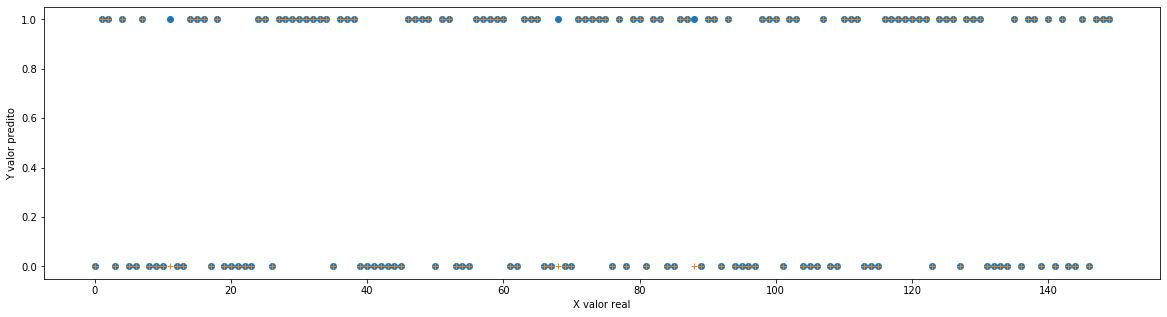

In [57]:
plt.figure(figsize=(20,5))
plt.plot(aux[:150], 'o')
plt.plot(predicao[:150], '+')
plt.xlabel('X valor real')
plt.ylabel('Y valor predito')

In [58]:
from sklearn import metrics
#MAE é o mais fácil de entender, porque é o erro médio.
#MSE é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
#RMSE é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".
print('MAE:', metrics.mean_absolute_error(y_teste, predicao))
print('MSE:', metrics.mean_squared_error(y_teste, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predicao)))

MAE: 3.725948509485095
MSE: 0.0260840108401084
RMSE: 0.16150545142535716


In [59]:
print('Variance score: %.2f' % floA.score(x_teste,aux))

Variance score: 0.97


In [60]:
#fazendo a predicao usando cross-valodation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(floA,x,y, cv=10)

In [61]:
print('Variance Cros-Validation rscore: %.2f' % max(scores))

Variance Cros-Validation rscore: 0.98


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,predicao))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1476
           1       0.98      0.97      0.97      1476

    accuracy                           0.97      2952
   macro avg       0.97      0.97      0.97      2952
weighted avg       0.97      0.97      0.97      2952



In [63]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_teste,predicao))

[[1442   34]
 [  43 1433]]
